In [18]:
# link = 'https://api.coronavirus.data.gov.uk/v1/data'

# Imports
from uk_covid19 import Cov19API
import pandas as pd


# Filters
england_only = ['areaType=nation',
                'areaName=England'
]

# Structure
cases_and_deaths = {
    "date": "date",
    "areaName": "areaName",
    "areaCode": "areaCode",
    "newCasesByPublishDate": "newCasesByPublishDate",
    "cumCasesByPublishDate": "cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate",
    "cumDeaths28DaysByDeathDate": "cumDeaths28DaysByDeathDate"
}

# Instantiation : Use filters and structure to initialise the Covid19API object
api = Cov19API(filters=england_only, structure=cases_and_deaths)

# Extracting data
data = api.get_json()

#print(data)




In [6]:
# Request API timestamp
api_timestamp = api.last_update

print(api_timestamp)

release_timestamp = api.get_release_timestamp()
print(release_timestamp)

2021-12-29T18:00:03.000000Z
2021-12-29T18:00:03.330207Z


In [21]:
# Latest data

from uk_covid19 import Cov19API


all_nations = [
    "areaType=nation"
]

cases_and_deaths = {
    "date": "date",
    "areaName": "areaName",
    "areaCode": "areaCode",
    "newCasesByPublishDate": "newCasesByPublishDate",
    "cumCasesByPublishDate": "cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate",
    "cumDeaths28DaysByDeathDate": "cumDeaths28DaysByDeathDate"
}

api = Cov19API(
    filters=all_nations,
    structure=cases_and_deaths,
    latest_by="newCasesByPublishDate"
)

data = api.get_json()

print(data)

{'data': [{'date': '2021-12-29', 'areaName': 'England', 'areaCode': 'E92000001', 'newCasesByPublishDate': 138287, 'cumCasesByPublishDate': 10683026, 'newDeaths28DaysByDeathDate': None, 'cumDeaths28DaysByDeathDate': None}, {'date': '2021-12-29', 'areaName': 'Northern Ireland', 'areaCode': 'N92000002', 'newCasesByPublishDate': 22972, 'cumCasesByPublishDate': 390153, 'newDeaths28DaysByDeathDate': None, 'cumDeaths28DaysByDeathDate': None}, {'date': '2021-12-29', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 15849, 'cumCasesByPublishDate': 886065, 'newDeaths28DaysByDeathDate': None, 'cumDeaths28DaysByDeathDate': None}, {'date': '2021-12-29', 'areaName': 'Wales', 'areaCode': 'W92000004', 'newCasesByPublishDate': 5929, 'cumCasesByPublishDate': 600682, 'newDeaths28DaysByDeathDate': None, 'cumDeaths28DaysByDeathDate': None}], 'lastUpdate': '2021-12-29T18:00:03.000000Z', 'length': 4, 'totalPages': None}


In [9]:
# Save the data

from uk_covid19 import Cov19API
import pandas as pd


all_nations = [
    "areaType=nation"
]

cases_and_deaths = {
    "date": "date",
    "areaName": "areaName",
    "areaCode": "areaCode",
    "newCasesByPublishDate": "newCasesByPublishDate",
    "cumCasesByPublishDate": "cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate",
    "cumDeaths28DaysByDeathDate": "cumDeaths28DaysByDeathDate"
}

api = Cov19API(
    filters=all_nations,
    structure=cases_and_deaths,
    latest_by="newCasesByPublishDate"
)

api.get_json(save_as="data.json")

# Read from file using pandas
df = pd.read_json('data.json')
print(df.data.head)

<bound method NDFrame.head of 0    {'date': '2021-12-29', 'areaName': 'England', ...
1    {'date': '2021-12-29', 'areaName': 'Northern I...
2    {'date': '2021-12-29', 'areaName': 'Scotland',...
3    {'date': '2021-12-29', 'areaName': 'Wales', 'a...
Name: data, dtype: object>


In [13]:
# Pandas dataframes

from uk_covid19 import Cov19API
import pandas as pd

all_nations = [
    "areaType=nation"
]

cases_and_deaths = {
    "date": "date",
    "areaName": "areaName",
    "areaCode": "areaCode",
    "newCasesByPublishDate": "newCasesByPublishDate",
    "cumCasesByPublishDate": "cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate",
    "cumDeaths28DaysByDeathDate": "cumDeaths28DaysByDeathDate"
}

api = Cov19API(
    filters=all_nations,
    structure=cases_and_deaths
)

df = api.get_dataframe()

print(df.head())

df.to_csv('pandasdata.csv')


         date areaName   areaCode  newCasesByPublishDate  \
0  2021-12-29  England  E92000001                 138287   
1  2021-12-28  England  E92000001                 117093   
2  2021-12-27  England  E92000001                  98515   
3  2021-12-26  England  E92000001                 103558   
4  2021-12-25  England  E92000001                 113628   

   cumCasesByPublishDate  newDeaths28DaysByDeathDate  \
0               10683026                         NaN   
1               10545584                         9.0   
2               10429274                        23.0   
3               10332128                        11.0   
4               10229538                        10.0   

   cumDeaths28DaysByDeathDate  
0                         NaN  
1                    128724.0  
2                    128715.0  
3                    128692.0  
4                    128681.0  


Last 30 days: 
<bound method NDFrame.head of 1      24.0
2      85.0
3      73.0
4      68.0
5      49.0
6      80.0
7      94.0
8      99.0
9      79.0
10     91.0
11     84.0
12     86.0
13    103.0
14     86.0
15     94.0
16    107.0
17     86.0
18    102.0
19     75.0
20     87.0
21     97.0
22     92.0
23     94.0
24    108.0
25     91.0
26    115.0
27    108.0
28     84.0
29    103.0
Name: newDeaths28DaysByDeathDate, dtype: float64>
Startdate: 2021-12-01
Enddate: 2021-12-30
Cases: 
max cases: 146604
min cases: 37396


<AxesSubplot:>

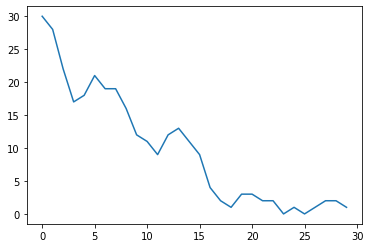

In [68]:
# Imports
from uk_covid19 import Cov19API
import pandas as pd

# Filters
england_only = ['areaType=nation',
                'areaName=England'
]

# Structure
cases_and_deaths = {
    "date": "date",
    "areaName": "areaName",
    "areaCode": "areaCode",
    "newCasesByPublishDate": "newCasesByPublishDate",
    "cumCasesByPublishDate": "cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate",
    "cumDeaths28DaysByDeathDate": "cumDeaths28DaysByDeathDate"
}

api = Cov19API(
    filters=england_only,
    structure=cases_and_deaths
)

df = api.get_dataframe()

# print(df.head())

# Cull data to only last 30 days
daysToDisplay = 30
df = df.head(daysToDisplay)
print(f'Last {daysToDisplay} days: ')
#print(df)

df.to_csv('EnglandData.csv')
startdate = df['date'].iloc[-1]
enddate = df['date'].iloc[0]

cases = df['newCasesByPublishDate']

deaths = df['newDeaths28DaysByDeathDate']
deaths = deaths[deaths.notna()]
print(deaths.head)

print(f'Startdate: {startdate}')
print(f'Enddate: {enddate}')
print('Cases: ')

#print(cases.head)

maxcases = cases.max()
mincases = cases.min()
range = maxcases - mincases
print(f'max cases: {maxcases}')
print(f'min cases: {mincases}')

graphHeightInPixels = 30
graphPixelsPerDay = 1

casesPerPixel = range/graphHeightInPixels

# Calculate the heights of the dataset
heights = round((cases - mincases)/casesPerPixel)
#print(heights.head)

heights.plot()
